## Create charts showing diapers delivered in 2020 and how deliveries increased after tornado

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
#import NDC deliveries csv
deliveries = pd.read_csv('../data/Nash Diaper Stastistics - 2020 Deliveries.csv',
                        skipfooter = 12,  
                        engine = 'python')
print(deliveries.shape)
deliveries.head()

(754, 16)


,Partners,Date,NB,1,2,3,4,5,6,Pullups,Total,Running Total,Ever to Date,Year to Date,Unnamed: 14,Unnamed: 15
0,NICE Highlands Apartments,1/4/2020,500.0,400.0,450.0,600.0,600.0,600.0,600.0,NaN,3750,3750,2321750,NaN,NaN,NaN
1,Martha O'Bryan,1/7/2020,NaN,NaN,NaN,NaN,600.0,600.0,600.0,NaN,1800,5550,2323550,NaN,NaN,NaN
2,Madison Hispanic 7th Day,1/7/2020,NaN,NaN,450.0,450.0,500.0,750.0,750.0,NaN,2900,8450,2326450,NaN,"2,900",NaN
3,Legacy Mission Village,1/7/2020,1000.0,1000.0,1600.0,2375.0,4500.0,4800.0,4800.0,NaN,20075,28525,2346525,NaN,NaN,NaN
4,Tusculum Elementary,1/7/2020,150.0,175.0,150.0,150.0,150.0,150.0,150.0,NaN,1075,29600,2347600,NaN,NaN,NaN


In [3]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Partners       754 non-null    object 
 1   Date           754 non-null    object 
 2   NB             710 non-null    float64
 3   1              712 non-null    float64
 4   2              722 non-null    float64
 5   3              731 non-null    float64
 6   4              736 non-null    float64
 7   5              742 non-null    float64
 8   6              738 non-null    float64
 9   Pullups        17 non-null     object 
 10  Total          754 non-null    int64  
 11  Running Total  754 non-null    int64  
 12  Ever to Date   754 non-null    int64  
 13  Year to Date   42 non-null     object 
 14  Unnamed: 14    56 non-null     object 
 15  Unnamed: 15    18 non-null     object 
dtypes: float64(7), int64(3), object(6)
memory usage: 94.4+ KB


In [4]:
#convert Date to datetime and separate into separate columns 
deliveries['Date']= pd.to_datetime(deliveries['Date'],format='%m/%d/%Y')
deliveries['month_year'] = pd.to_datetime(deliveries['Date'], errors='coerce').dt.strftime('%m/%y')
#deliveries['year']= deliveries['Date'].dt.year
#deliveries['month']= deliveries['Date'].dt.month
#deliveries['day']= deliveries['Date'].dt.day
deliveries.head()

,Partners,Date,NB,1,2,3,4,5,6,Pullups,Total,Running Total,Ever to Date,Year to Date,Unnamed: 14,Unnamed: 15,month_year
0,NICE Highlands Apartments,2020-01-04,500.0,400.0,450.0,600.0,600.0,600.0,600.0,NaN,3750,3750,2321750,NaN,NaN,NaN,01/20
1,Martha O'Bryan,2020-01-07,NaN,NaN,NaN,NaN,600.0,600.0,600.0,NaN,1800,5550,2323550,NaN,NaN,NaN,01/20
2,Madison Hispanic 7th Day,2020-01-07,NaN,NaN,450.0,450.0,500.0,750.0,750.0,NaN,2900,8450,2326450,NaN,"2,900",NaN,01/20
3,Legacy Mission Village,2020-01-07,1000.0,1000.0,1600.0,2375.0,4500.0,4800.0,4800.0,NaN,20075,28525,2346525,NaN,NaN,NaN,01/20
4,Tusculum Elementary,2020-01-07,150.0,175.0,150.0,150.0,150.0,150.0,150.0,NaN,1075,29600,2347600,NaN,NaN,NaN,01/20


In [5]:
#only keep relevant columns
deliveries = deliveries[['month_year', 'Total']].copy()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month_year  754 non-null    object
 1   Total       754 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.9+ KB


In [6]:
#convert month number to name and Total to integer
#deliveries['month'] = pd.to_datetime(deliveries['month'], format='%m').dt.month_name().str.slice(stop=3)
#deliveries['year'] = pd.to_datetime(deliveries['year'], format='%Y').dt.year_name().str.slice(stop=3)
deliveries['Total']=deliveries['Total'].astype(int)
#deliveries.tail()

In [7]:
#group by month and sum totala
deliveries=deliveries.groupby(['month_year'], as_index=False)['Total'].sum()
deliveries.head()

,month_year,Total
0,01/20,66063
1,02/20,79202
2,03/20,196790
3,04/20,222725
4,05/20,235716


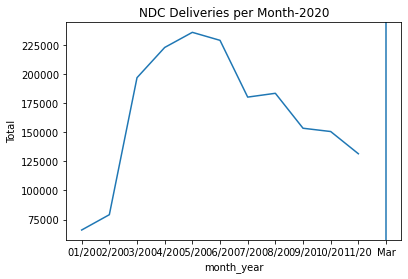

In [8]:
#create seaborn line chart
sns.lineplot(
    x="month_year",
    y="Total",
    sort=False,
    data=deliveries
).set_title('NDC Deliveries per Month-2020')
plt.axvline('Mar')
plt.show()

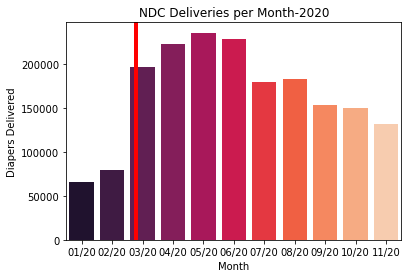

In [9]:
#seaborn barchart
ndc_deliveries_by_month = sns.barplot(x = 'month_year', y = 'Total', data = deliveries,
            palette = "rocket",
            capsize = 0.05,             
            saturation = 8,             
            )
plt.ylabel('Diapers Delivered')
plt.xlabel('Month')
plt.title('NDC Deliveries per Month-2020')

plt.axvline(1.8,linewidth=4, color='r');

plt.show()

#figure = ndc_deliveries_by_month.get_figure()    
#figure.savefig('ndc_deliveries_by_month.png',bbox_inches='tight')

In [10]:
#import 2019 NDC deliveries csv
deliveries_19 = pd.read_csv('../data/2019 deliveries.csv')
#print(deliveries.shape)
deliveries_19.head()

,Partners,Date,NB,1,2,3,4,5,6,Pullups,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,St. Luke's,1/4/19,NaN,NaN,NaN,200.0,400.0,350,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Southeast Community Center,1/4/19,400.0,450.0,450.0,450.0,600.0,600,600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NICE,1/4/19,400.0,375.0,300.0,450.0,425.0,450,450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Legacy Mission Village,1/7/19,750.0,800.0,800.0,1500.0,3900.0,3900,3900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Catholic Charities,1/8/19,300.0,0.0,300.0,300.0,300.0,300,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#convert Date to datetime and separate into separate columns 
deliveries_19['Date']= pd.to_datetime(deliveries_19['Date'],format='%m/%d/%y')
deliveries_19['month_year'] = pd.to_datetime(deliveries_19['Date'], errors='coerce').dt.strftime('%m/%y')
deliveries_19.head()

,Partners,Date,NB,1,2,3,4,5,6,Pullups,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,month_year
0,St. Luke's,2019-01-04,NaN,NaN,NaN,200.0,400.0,350,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/19
1,Southeast Community Center,2019-01-04,400.0,450.0,450.0,450.0,600.0,600,600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/19
2,NICE,2019-01-04,400.0,375.0,300.0,450.0,425.0,450,450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/19
3,Legacy Mission Village,2019-01-07,750.0,800.0,800.0,1500.0,3900.0,3900,3900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/19
4,Catholic Charities,2019-01-08,300.0,0.0,300.0,300.0,300.0,300,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/19


In [12]:
#only keep relevant columns
deliveries_19 = deliveries_19[['month_year', 'Totals']].copy()
deliveries_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month_year  279 non-null    object
 1   Totals      279 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


In [13]:
#convert month number to name and Total to integer
#deliveries_19['month'] = pd.to_datetime(deliveries_19['month'], format='%m').dt.month_name().str.slice(stop=3)
deliveries_19['Totals']=deliveries_19['Totals'].astype(int)
deliveries_19=deliveries_19.rename(columns = {'Totals':'total'})
deliveries_19.head()

,month_year,total
0,01/19,1250
1,01/19,3550
2,01/19,2850
3,01/19,15550
4,01/19,1800


In [14]:
#group by month and sum totals
deliveries_19=deliveries_19.groupby(['month_year'], as_index=False)['total'].sum()
deliveries_19.head()

,month_year,total
0,01/19,74300
1,02/19,59725
2,03/19,54500
3,04/19,54917
4,05/19,68261


In [15]:
#merge 2019 and 2020 deliveries
deliveries=deliveries.rename(columns = {'Total':'total'})
del_combined = pd.concat([deliveries_19, deliveries])
del_combined

,month_year,total
0,01/19,74300
1,02/19,59725
2,03/19,54500
3,04/19,54917
4,05/19,68261
5,06/19,74155
6,07/19,70885
7,08/19,72277
8,09/19,88217
9,10/19,86775


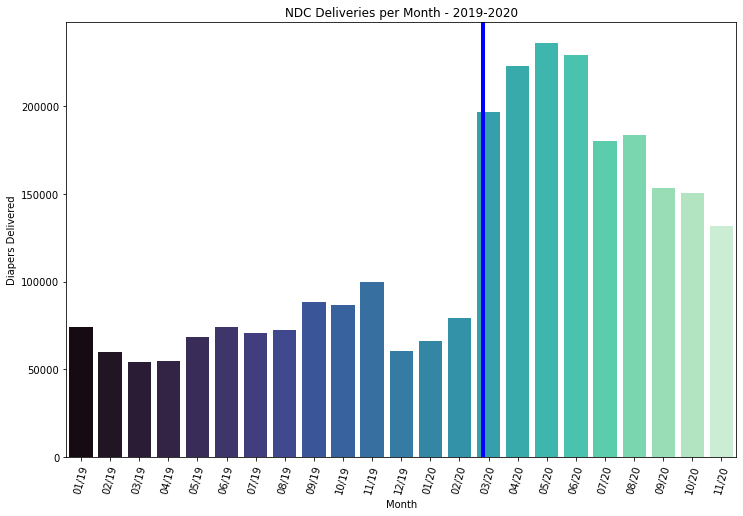

In [24]:
#seaborn barchart for 2019, 2020
plt.figure(figsize=(12, 8))

ndc_deliveries_by_month = sns.barplot(x = 'month_year', y = 'total', data = del_combined,
            palette = "mako",
            capsize = 0.05,             
            saturation = 8,             
            )
plt.ylabel('Diapers Delivered')
plt.xlabel('Month')
plt.title('NDC Deliveries per Month - 2019-2020')

ndc_deliveries_by_month.set_xticklabels(ndc_deliveries_by_month.get_xticklabels(), rotation=75)

plt.axvline(13.8,linewidth=4, color='b');

plt.show()

figure = ndc_deliveries_by_month.get_figure()    
figure.savefig('../files/ndc_deliveries_by_month_2_yrs.png',bbox_inches='tight', dpi=300)